In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go 
import plotly.offline as py 
import math
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import gdown
!gdown --fuzzy "https://drive.google.com/file/d/19q09IFhfkOOBOXvn_dKhWjILJtjCcsjc/view?usp=drive_link"
!gdown --fuzzy "https://drive.google.com/file/d/1DiBxn8TXdbJqoSw58pYUeaqO3oOKhuQO/view?usp=drive_link"
!gdown --fuzzy "https://drive.google.com/file/d/1Q2yG_CIDvfdGP-fKVPSw979EYgQukjz5/view?usp=drive_link"

Downloading...
From (original): https://drive.google.com/uc?id=19q09IFhfkOOBOXvn_dKhWjILJtjCcsjc
From (redirected): https://drive.google.com/uc?id=19q09IFhfkOOBOXvn_dKhWjILJtjCcsjc&confirm=t&uuid=253c15ff-8802-4f69-be84-17b4f1fce4af
To: /Users/fffuuuming/Desktop/study/master_1_2/fintech/final_project/impl/elliptic-fork/Transactions Dataset/txs_features.csv
100%|████████████████████████████████████████| 695M/695M [00:44<00:00, 15.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DiBxn8TXdbJqoSw58pYUeaqO3oOKhuQO
To: /Users/fffuuuming/Desktop/study/master_1_2/fintech/final_project/impl/elliptic-fork/Transactions Dataset/txs_classes.csv
100%|██████████████████████████████████████| 2.36M/2.36M [00:00<00:00, 11.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Q2yG_CIDvfdGP-fKVPSw979EYgQukjz5
To: /Users/fffuuuming/Desktop/study/master_1_2/fintech/final_project/impl/elliptic-fork/Transactions Dataset/txs_edgelist.csv
100%|██████████████████████████████████████| 4.47M/4.47M

In [476]:
print("\nTransaction features: \n")
df_txs_features = pd.read_csv("txs_features.csv")
df_txs_features

print("\nTransaction classes: \n")
df_txs_classes = pd.read_csv("txs_classes.csv")
df_txs_classes

print("\nTransaction-Transaction edgelist: \n")
df_txs_edgelist = pd.read_csv("txs_edgelist.csv")
df_txs_edgelist


Transaction features: 



,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,0.308900,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,158304003,49,-0.165622,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203765,158303998,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203766,158303966,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203767,161526077,49,-0.172212,-0.139573,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.162856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Transaction classes: 



,txId,class
0,3321,3
1,11108,3
2,51816,3
3,68869,2
4,89273,2
...,...,...
203764,158304003,3
203765,158303998,3
203766,158303966,3
203767,161526077,3



Transaction-Transaction edgelist: 



,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
234350,158365409,157930723
234351,188708874,188708879
234352,157659064,157659046
234353,87414554,106877725


## Data Preprocessing

- Drop nodes (transactions) without augmented feature values (0.5% not de-anonymized)
- Drop edges accordingly

In [477]:
# 1. 把 feature DataFrame 裡含 NaN 的行丟掉
df_txs_features = df_txs_features.dropna()
# 2. 取出還在的 txId（假設 index 就是 txId）
valid_tx = set(df_txs_features.txId)

# 3. 篩邊表：只保留 txId1 與 txId2 都在 valid_tx 裡面的邊
df_txs_edgelist = df_txs_edgelist[
    df_txs_edgelist['txId1'].isin(valid_tx) &
    df_txs_edgelist['txId2'].isin(valid_tx)
].reset_index(drop=True)

In [478]:
df_txs_edgelist

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
233278,158365409,157930723
233279,188708874,188708879
233280,157659064,157659046
233281,87414554,106877725


Merge class into txs_features for later index mapping

In [479]:
subset = df_txs_classes[['txId', 'class']]

# 2. 用 merge 把 class 欄併到 txs_features
df_txs_features = df_txs_features.merge(
    subset,
    on='txId',     # 以 txId 當作 key
    how='left'     # 保留 txs_features 所有列，對不到的 class 欄會是 NaN
)

In [480]:
df_txs_features

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,...,115.952889,115.952889,115.952889,115.952889,1.653300e+00,114.299544,57.976422,57.976422,115.952844,3
202800,194747925,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,...,114.250098,114.250098,114.250098,114.250098,2.035300e-02,114.229700,57.125027,57.125027,114.250053,3
202801,194748063,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,...,113.606771,113.606771,113.606771,113.606771,9.257490e-01,112.680977,56.803363,56.803363,113.606726,3
202802,194748070,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,...,112.680977,112.680977,112.680977,112.680977,3.026970e-01,112.378235,56.340466,56.340466,112.680932,3


Normalize augmented features

In [481]:
# For notmalize augmented features
from sklearn.preprocessing import MinMaxScaler

for column in df_txs_features.columns[-18:-1]:
    scaler = MinMaxScaler()
    df_txs_features[column] = scaler.fit_transform(df_txs_features[[column]])

In [482]:
df_txs_features

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.000047,0.000047,0.000047,0.000047,8.301504e-05,0.000032,0.000089,8.904096e-05,0.000047,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,0.000493,0.000493,0.000493,0.000493,2.915711e-04,0.000444,0.000936,9.357923e-04,0.000493,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.000040,0.000040,0.000040,0.000040,1.134016e-04,0.000020,0.000076,7.612341e-05,0.000040,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,0.000702,0.000272,0.000088,0.000817,6.113009e-04,0.000714,0.001552,1.552291e-03,0.000817,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,0.074805,0.074805,0.074805,0.074805,6.466160e-11,0.003648,0.000022,1.451405e-07,0.074805,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,...,0.010179,0.010179,0.010179,0.010179,8.223464e-04,0.010104,0.019336,1.933576e-02,0.010179,3
202800,194747925,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,...,0.010029,0.010029,0.010029,0.010029,1.012352e-05,0.010098,0.019052,1.905181e-02,0.010029,3
202801,194748063,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,...,0.009973,0.009973,0.009973,0.009973,4.604647e-04,0.009961,0.018945,1.894453e-02,0.009973,3
202802,194748070,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,...,0.009891,0.009891,0.009891,0.009891,1.505606e-04,0.009935,0.018790,1.879015e-02,0.009891,3


In [483]:
df_txs_features = df_txs_features.set_index('txId')
df_txs_features.sort_index()

y = df_txs_features['class']
time_steps = df_txs_features['Time step']
train_mask, test_mask = time_steps <= 34, time_steps > 34

df_txs_features = df_txs_features.drop(columns=['class', 'Time step'])

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
txId,,,,,,,,,,,,,,,,,,,,,
1076,48,-0.168500,0.270909,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163591,-0.164980,...,6.180084e-05,3.127478e-05,3.127597e-05,6.254833e-05,6.676470e-06,6.164291e-05,1.185148e-04,1.185150e-04,6.238815e-05,3
2534,6,-0.170834,-0.131425,1.018602,0.028105,0.055376,0.054722,-0.061584,-0.163572,-0.167757,...,2.350094e-05,9.975293e-06,5.421152e-06,2.992583e-05,9.815134e-08,2.194331e-05,1.622788e-05,8.509850e-06,2.990209e-05,2
3181,34,1.305212,-0.210553,-1.756361,-0.121970,97.300650,-0.113002,-0.061584,1.348765,1.321754,...,2.057192e-02,2.057192e-02,2.057192e-02,2.057192e-02,5.070912e-07,2.430414e-04,1.592931e-05,5.025955e-06,2.057192e-02,2
3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,-0.166062,...,4.688075e-05,4.688076e-05,4.688195e-05,4.687833e-05,8.301504e-05,3.244988e-05,8.904078e-05,8.904096e-05,4.687265e-05,3
3889,48,-0.086232,-0.101835,-0.646376,-0.121970,17.046997,-0.113002,-0.061584,-0.074885,-0.081943,...,1.207336e-03,1.207336e-03,1.207337e-03,1.207333e-03,5.184866e-08,2.625465e-04,5.313067e-06,7.031674e-07,1.207300e-03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403203785,28,-0.172978,-0.172527,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163640,-0.169455,...,7.368421e-08,7.369663e-08,7.488595e-08,7.126406e-08,5.282356e-08,5.251141e-08,1.157616e-07,1.159417e-07,6.146496e-08,3
403234712,28,-0.172669,-0.158783,-1.201369,-0.121970,-0.063725,-0.113002,-0.061584,-0.163323,-0.169142,...,4.387898e-06,4.387910e-06,4.389099e-06,4.385477e-06,2.477037e-05,4.401941e-06,1.660683e-05,1.660701e-05,4.371017e-06,3
403234715,28,-0.172669,-0.158783,-1.201369,-0.121970,-0.063725,-0.113002,-0.061584,-0.163323,-0.169142,...,4.387898e-06,4.387910e-06,4.389099e-06,4.385477e-06,2.477037e-05,4.401941e-06,1.660683e-05,1.660701e-05,4.371017e-06,3


In [484]:
y[y == 2] = 0   # licit
y[y == 3] = 2   # unknown

In [485]:
y

txId
3321         2
11108        2
51816        2
68869        0
89273        0
            ..
194747812    2
194747925    2
194748063    2
194748070    2
194835939    2
Name: class, Length: 202804, dtype: int64

In [486]:
from torch_geometric.data import Data
import torch

ids_from_src      = df_txs_edgelist['txId1']
ids_from_dst      = df_txs_edgelist['txId2']

all_ids = pd.unique(pd.concat([ids_from_src, ids_from_dst]))
id_map  = {orig_id: idx for idx, orig_id in enumerate(all_ids)}
df_txs_features.index = df_txs_features.index.map(id_map)

src = df_txs_edgelist['txId1'].map(id_map).values
dst = df_txs_edgelist['txId2'].map(id_map).values
edge_index = torch.tensor([src, dst], dtype=torch.long)

In [487]:
time_steps = torch.tensor(time_steps.values, dtype=torch.long)

x = torch.tensor(df_txs_features.values, dtype=torch.float)
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask, node_time=time_steps)
data.y = torch.from_numpy(data.y.to_numpy().astype(int)).long()

data

Data(x=[202804, 182], edge_index=[2, 233283], y=[202804], train_mask=txId
3321          True
11108         True
51816         True
68869         True
89273         True
             ...  
194747812    False
194747925    False
194748063    False
194748070    False
194835939    False
Name: Time step, Length: 202804, dtype: bool, test_mask=txId
3321         False
11108        False
51816        False
68869        False
89273        False
             ...  
194747812     True
194747925     True
194748063     True
194748070     True
194835939     True
Name: Time step, Length: 202804, dtype: bool, node_time=[202804])

## (i) Single Graph Dataset

In [ ]:
import random

def sample_same_timestep_negative_edges(data: Data, neg_per_pos=1):
    node_time = data.node_time
    edge_index = data.edge_index
    num_nodes = data.num_nodes

    # Step 1: Build positive edge list
    pos_edge_index = edge_index

    # Step 2: Group node indices by time
    time_to_nodes = {}
    for t in torch.unique(node_time):
        nodes = (node_time == t).nonzero(as_tuple=True)[0].tolist()
        time_to_nodes[t.item()] = nodes

    # Step 3: Build a set of existing edges for quick lookup
    existing_edges = set((u.item(), v.item()) for u, v in edge_index.t())

    # Step 4: Sample negative edges within each timestep
    neg_edges = []
    max_trials = 10 * len(nodes) ** 2  # safeguard to avoid infinite loop     

    for t, nodes in time_to_nodes.items():
        trials = 0
        sampled = 0
        while sampled < neg_per_pos * len(pos_edge_index[0]) and trials < max_trials:
            u, v = random.sample(nodes, 2)
            if (u, v) not in existing_edges and (v, u) not in existing_edges and u != v:
                neg_edges.append((u, v))
                sampled += 1
            trials += 1

    # Step 5: Convert to tensors
    neg_edge_index = torch.tensor(neg_edges, dtype=torch.long).t()
    pos_edge_label = torch.ones(pos_edge_index.size(1), dtype=torch.float)
    neg_edge_label = torch.zeros(neg_edge_index.size(1), dtype=torch.float)

    edge_label_index = torch.cat([pos_edge_index, neg_edge_index], dim=1)
    edge_label = torch.cat([pos_edge_label, neg_edge_label], dim=0)

    return edge_label_index, edge_label

In [437]:
edge_label_index, edge_label = sample_same_timestep_negative_edges(data, neg_per_pos=1)

t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17
t = 18
t = 19
t = 20
t = 21
t = 22
t = 23
t = 24
t = 25
t = 26
t = 27
t = 28
t = 29
t = 30
t = 31
t = 32
t = 33
t = 34
t = 35
t = 36
t = 37
t = 38
t = 39
t = 40
t = 41
t = 42
t = 43
t = 44
t = 45
t = 46
t = 47
t = 48
t = 49


In [442]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GAE
from sklearn.metrics import f1_score, precision_score, recall_score


# 2) Encoder + Classifier
class GAEEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)
    
in_feats    = data.num_node_features
hidden_dim  = 128
out_dim     = 64
num_classes = int(data.y[data.y != 2].max() + 1)

encoder    = GAEEncoder(in_feats, hidden_dim, out_dim)
gae_model  = GAE(encoder)

optimizer = torch.optim.Adam(
    list(gae_model.parameters()),
    lr=0.001
)
bce_loss = torch.nn.BCEWithLogitsLoss()



epochs = 100
for epoch in range(1, epochs+1):
    _ = gae_model.train()
    optimizer.zero_grad()

    z = gae_model.encode(data.x, data.edge_index)  # Full graph for encoder
    logits = gae_model.decode(z, edge_label_index).view(-1)
    loss = F.binary_cross_entropy_with_logits(logits, edge_label)

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f}")

Epoch 001 | Loss: 1.2728
Epoch 002 | Loss: 1.2507
Epoch 003 | Loss: 1.2195
Epoch 004 | Loss: 1.1822
Epoch 005 | Loss: 1.1425
Epoch 006 | Loss: 1.1043
Epoch 007 | Loss: 1.0706
Epoch 008 | Loss: 1.0430
Epoch 009 | Loss: 1.0221
Epoch 010 | Loss: 1.0074
Epoch 011 | Loss: 0.9979
Epoch 012 | Loss: 0.9926
Epoch 013 | Loss: 0.9902
Epoch 014 | Loss: 0.9895
Epoch 015 | Loss: 0.9898
Epoch 016 | Loss: 0.9904
Epoch 017 | Loss: 0.9908
Epoch 018 | Loss: 0.9908
Epoch 019 | Loss: 0.9902
Epoch 020 | Loss: 0.9891
Epoch 021 | Loss: 0.9876
Epoch 022 | Loss: 0.9858
Epoch 023 | Loss: 0.9837
Epoch 024 | Loss: 0.9815
Epoch 025 | Loss: 0.9793
Epoch 026 | Loss: 0.9771
Epoch 027 | Loss: 0.9750
Epoch 028 | Loss: 0.9730
Epoch 029 | Loss: 0.9711
Epoch 030 | Loss: 0.9694
Epoch 031 | Loss: 0.9678
Epoch 032 | Loss: 0.9665
Epoch 033 | Loss: 0.9652
Epoch 034 | Loss: 0.9642
Epoch 035 | Loss: 0.9632
Epoch 036 | Loss: 0.9623
Epoch 037 | Loss: 0.9615
Epoch 038 | Loss: 0.9607
Epoch 039 | Loss: 0.9600
Epoch 040 | Loss: 0.9593


KeyboardInterrupt: 

## (ii) Temporal Graph Dataset
Extract each sub-graph for splitting

In [471]:
import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.transforms import RandomLinkSplit

class PerTimestepEdgeLabelDataset(InMemoryDataset):
    def __init__(self, data: Data, neg_sampling_ratio=1.0):
        super().__init__("/tmp")
        self.data_list = []

        for t in torch.unique(data.node_time):
            if t >= 42:
                break

            # print(f"t = {t}")

            subgraph_t = self.build_subgraph(data, t)
            if subgraph_t is None:
                continue
                
            train_data_t = self.random_split(subgraph_t, neg_sampling_ratio=neg_sampling_ratio)
            
            pos_edge_index = train_data_t.pos_edge_label_index
            neg_edge_index = train_data_t.neg_edge_label_index

            edge_label_index = torch.cat([pos_edge_index, neg_edge_index], dim=1)
            edge_label = torch.cat([
                torch.ones(pos_edge_index.size(1), dtype=torch.float),
                torch.zeros(neg_edge_index.size(1), dtype=torch.float)
            ], dim=0)

            data_t = Data(
                x=subgraph_t.x,
                edge_index=train_data_t.edge_index,
                edge_label_index=edge_label_index,
                edge_label=edge_label,
                node_time=subgraph_t.node_time,
            )
            self.data_list.append(data_t)

    def build_subgraph(self, data, time_step):
        node_mask = data.node_time == time_step
        if node_mask.sum() == 0:
            return None

        src, dst = data.edge_index
        edge_mask = node_mask[src] & node_mask[dst]
        edge_index_t = data.edge_index[:, edge_mask]

        if edge_index_t.size(1) == 0:
            # print("None")
            return None
        
        node_indices = node_mask.nonzero(as_tuple=True)[0]

        # 注意：x 和 node_time 都只保留時間 t 
        x_t = data.x[node_indices]
        node_time_t = data.node_time[node_indices]

        # 建圖時重新編號節點 (Optional: for cleaner subgraph)
        index_map = torch.full((data.num_nodes,), -1, dtype=torch.long)
        index_map[node_indices] = torch.arange(node_indices.size(0))
        edge_index_t = index_map[edge_index_t]

        return Data(
            x=x_t,
            edge_index=edge_index_t,    
            num_nodes=node_indices.size(0),
            node_time=node_time_t,
        )

    def random_split(self, data, neg_sampling_ratio=1.0):
        splitter = RandomLinkSplit(
            is_undirected=False,
            split_labels=True,
            add_negative_train_samples=True,
            neg_sampling_ratio=neg_sampling_ratio,
            num_val=0,
            num_test=0,
        )
        train_data_t, _, _ = splitter(data)
        return train_data_t

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        return self.data_list[idx]

In [472]:
from torch_geometric.loader import DataLoader

dataset = PerTimestepEdgeLabelDataset(data, neg_sampling_ratio=1.0)
len(dataset)

loader = DataLoader(dataset, batch_size=1, shuffle=False)

41

In [501]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv, GAE
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Define Encoder
class GAEEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

# Model & Optimizer
in_feats = data.num_node_features
hidden_dim = 256
out_dim = 128
encoder = GAEEncoder(in_feats, hidden_dim, out_dim)
gae_model = GAE(encoder)
optimizer = torch.optim.Adam(gae_model.parameters(), lr=0.0001)
bce_loss = torch.nn.BCEWithLogitsLoss()

# Get training subgraph (time step 1)
train_batch = dataset[0]

# Tracking metrics
loss_list, auc_list, f1_list, precision_list, recall_list = [], [], [], [], []

epochs = 300
for epoch in range(1, epochs + 1):
    _ = gae_model.train()
    optimizer.zero_grad()

    # Forward
    z = gae_model.encode(train_batch.x.squeeze(0), train_batch.edge_index.squeeze(0))
    edge_label_index = train_batch.edge_label_index.squeeze(0)
    edge_label = train_batch.edge_label.squeeze(0).float()
    logits = gae_model.decode(z, edge_label_index).view(-1)

    # Loss
    loss = bce_loss(logits, edge_label)
    loss.backward()
    optimizer.step()

    # Evaluation
    with torch.no_grad():
        probs = torch.sigmoid(logits).cpu()
        preds = (probs > 0.5).float()
        labels = edge_label.cpu()

        auc = roc_auc_score(labels, probs)
        f1 = f1_score(labels, preds)
        precision = precision_score(labels, preds)
        recall = recall_score(labels, preds)

        # Save metrics
        loss_list.append(loss.item())
        auc_list.append(auc)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)

        print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f} | AUC: {auc:.4f} | F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")

Epoch 001 | Loss: 0.8132 | AUC: 0.6255 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 002 | Loss: 0.8132 | AUC: 0.6349 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 003 | Loss: 0.8132 | AUC: 0.6436 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 004 | Loss: 0.8131 | AUC: 0.6524 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 005 | Loss: 0.8131 | AUC: 0.6608 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 006 | Loss: 0.8130 | AUC: 0.6683 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 007 | Loss: 0.8128 | AUC: 0.6761 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 008 | Loss: 0.8126 | AUC: 0.6838 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 009 | Loss: 0.8123 | AUC: 0.6910 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 010 | Loss: 0.8119 | AUC: 0.6974 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 011 | Loss: 0.8115 | AUC: 0.7042 | F1: 0.6667 | Precision: 0.5000 | Recall: 1.0000
Epoch 012 | Loss: 0.8

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Metric Value')

Text(0.5, 1.0, 'Training Metrics Over Epochs')

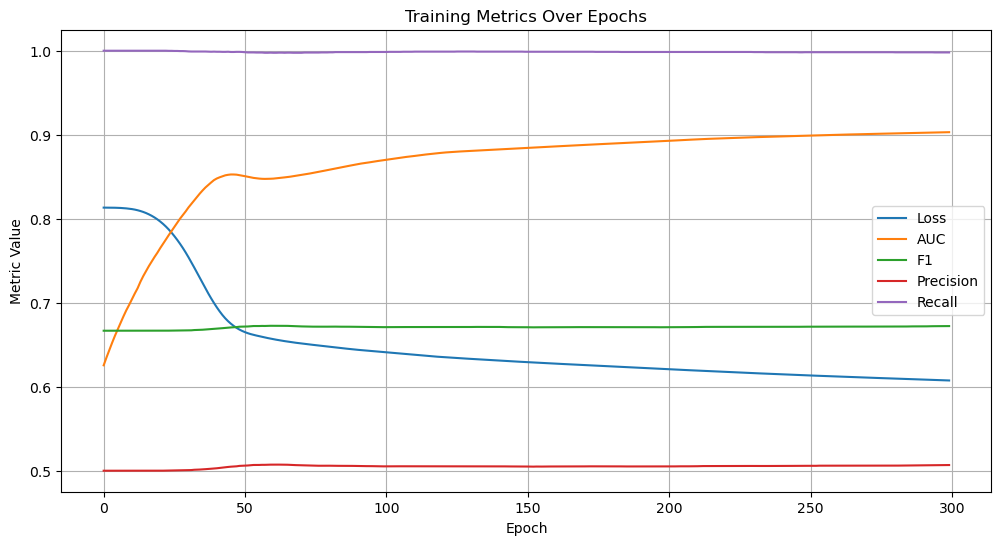

In [511]:
plt.figure(figsize=(12, 6))
plt.plot(loss_list, label='Loss')
plt.plot(auc_list, label='AUC')
plt.plot(f1_list, label='F1')
plt.plot(precision_list, label='Precision')
plt.plot(recall_list, label='Recall')
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Training Metrics Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

Min score: 0.5000, Max score: 0.7311
Fraction > 0.5: 0.9846


(array([1.070e+02, 1.200e+01, 2.000e+00, 8.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 5.000e+00, 4.000e+00,
        1.000e+00, 6.000e+00, 4.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        9.000e+00, 4.000e+00, 5.000e+00, 7.000e+00, 3.000e+00, 6.000e+00,
        5.000e+00, 7.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        9.000e+00, 8.000e+00, 1.200e+01, 1.000e+01, 1.600e+01, 1.500e+01,
        1.300e+01, 1.500e+01, 2.500e+01, 2.300e+01, 3.800e+01, 3.100e+01,
        3.300e+01, 5.400e+01, 7.800e+01, 7.800e+01, 1.120e+02, 1.460e+02,
        2.890e+02, 6.066e+03]),
 array([0.5       , 0.50462115, 0.50924236, 0.5138635 , 0.51848471,
        0.52310586, 0.52772701, 0.53234822, 0.53696936, 0.54159057,
        0.54621172, 0.55083287, 0.55545408, 0.56007522, 0.56469643,
        0.56931758, 0.57393873, 0.57855994, 0.58318108, 0.58780229,
        0.59242344, 0.59704459, 0.60166579, 0.60628694, 0.61090815,
        0.6155293 , 0.62015045, 0.62

(array([2409.,  446.,  360.,  271.,  206.,  190.,  161.,  127.,   96.,
         105.,   82.,   74.,   83.,   58.,   52.,   43.,   64.,   47.,
          45.,   49.,   36.,   40.,   27.,   37.,   33.,   28.,   26.,
          28.,   38.,   24.,   26.,   32.,   29.,   21.,   27.,   25.,
          30.,   22.,   30.,   33.,   23.,   36.,   35.,   37.,   41.,
          46.,   65.,   92.,  147., 1235.]),
 array([0.5       , 0.50462115, 0.50924236, 0.5138635 , 0.51848471,
        0.52310586, 0.52772701, 0.53234822, 0.53696936, 0.54159057,
        0.54621172, 0.55083287, 0.55545408, 0.56007522, 0.56469643,
        0.56931758, 0.57393873, 0.57855994, 0.58318108, 0.58780229,
        0.59242344, 0.59704459, 0.60166579, 0.60628694, 0.61090815,
        0.6155293 , 0.62015045, 0.62477165, 0.6293928 , 0.63401401,
        0.63863516, 0.64325631, 0.64787751, 0.65249866, 0.65711987,
        0.66174102, 0.66636217, 0.67098337, 0.67560452, 0.68022573,
        0.68484688, 0.68946803, 0.69408923, 0.69871038, 

Text(0.5, 0, 'Predicted Score')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Score Distribution')

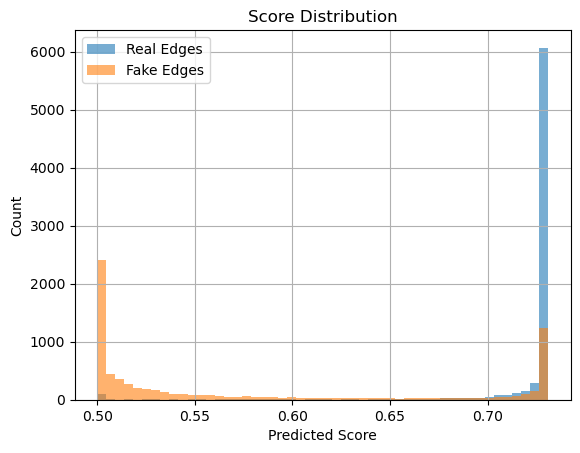

In [510]:
with torch.no_grad():
    _ = gae_model.eval()
    z = gae_model.encode(train_batch.x.squeeze(0), train_batch.edge_index.squeeze(0))
    logits = gae_model.decode(z, train_batch.edge_label_index.squeeze(0)).view(-1)
    probs = torch.sigmoid(logits).cpu()
    
    print(f"Min score: {probs.min().item():.4f}, Max score: {probs.max().item():.4f}")
    print(f"Fraction > 0.5: {(probs > 0.5).float().mean().item():.4f}")
    labels = train_batch.edge_label.squeeze(0).cpu()

    real_scores = probs[labels == 1]
    fake_scores = probs[labels == 0]

    plt.hist(real_scores.numpy(), bins=50, alpha=0.6, label='Real Edges')
    plt.hist(fake_scores.numpy(), bins=50, alpha=0.6, label='Fake Edges')
    plt.xlabel("Predicted Score")
    plt.ylabel("Count")
    plt.title("Score Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

In [509]:
with torch.no_grad():
    _ = gae_model.eval()

    test_batch = dataset[1]
    z_test = gae_model.encode(test_batch.x.squeeze(0), test_batch.edge_index.squeeze(0))
    edge_label_index_test = test_batch.edge_label_index.squeeze(0)
    edge_label_test = test_batch.edge_label.squeeze(0).float()
    logits_test = gae_model.decode(z_test, edge_label_index_test).view(-1)

    loss_test = bce_loss(logits_test, edge_label_test)

    probs_test = torch.sigmoid(logits_test).cpu()
    preds_test = (probs_test > 0.5).float()
    labels_test = edge_label_test.cpu()

    auc = roc_auc_score(labels_test, probs_test)
    f1 = f1_score(labels_test, preds_test)
    precision = precision_score(labels_test, preds_test)
    recall = recall_score(labels_test, preds_test)

    print(f"[Test Subgraph] Loss: {loss_test:.4f} | AUC: {auc:.4f} | F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")

[Test Subgraph] Loss: 0.6582 | AUC: 0.8606 | F1: 0.6738 | Precision: 0.5080 | Recall: 1.0000


In [ ]:
for batch_idx, batch in enumerate(loader):
    print(f"\nTraining on subgraph {batch_idx + 1} / {len(loader)}")

    for epoch in range(1, epochs_per_subgraph + 1):
        _ = gae_model.train()
        
        # Step 1: Encode
        z = gae_model.encode(batch.x.squeeze(0), batch.edge_index.squeeze(0))  # shape: [num_nodes, out_dim]

        # Step 2: Decode links (positive + negative edges)
        edge_label_index = batch.edge_label_index.squeeze(0)  # [2, N]
        edge_label = batch.edge_label.squeeze(0).float()      # [N]

        logits = gae_model.decode(z, edge_label_index).view(-1)

        # Step 3: Compute BCE loss
        loss = bce_loss(logits, edge_label)

        # Step 4: Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Subgraph {batch_idx + 1} | Epoch {epoch:03d} | Loss: {loss.item():.4f}")

## (iii) Naive random splitting on entire graph

In [410]:
from torch_geometric.transforms import RandomLinkSplit

splitter = RandomLinkSplit(
    is_undirected=False,
    split_labels=True,          
    add_negative_train_samples=True,
    neg_sampling_ratio=1.0,
    num_val=0,
    num_test=0,
)
train_data, val_data, test_data = splitter(data)

In [412]:
train_data.keys()
train_data.pos_edge_label

['pos_edge_label',
 'test_mask',
 'pos_edge_label_index',
 'neg_edge_label_index',
 'y',
 'edge_index',
 'train_mask',
 'node_time',
 'x',
 'neg_edge_label']

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [267]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GAE
from sklearn.metrics import f1_score, precision_score, recall_score

# 2) Encoder + Classifier
class GAEEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)
    
in_feats    = data.num_node_features
hidden_dim  = 128
out_dim     = 64
num_classes = int(data.y[data.y != 2].max() + 1)

encoder    = GAEEncoder(in_feats, hidden_dim, out_dim)
gae_model  = GAE(encoder)

optimizer = torch.optim.Adam(
    list(gae_model.parameters()),
    lr=0.001
)
bce_loss = torch.nn.BCEWithLogitsLoss()
ce_loss  = torch.nn.CrossEntropyLoss()

def train_gae_only():
    gae_model.train()
    optimizer.zero_grad()

    # encode on train positive edges
    z = gae_model.encode(train_data.x, train_data.edge_index)

    # AE loss (pos + neg)
    pos = train_data.pos_edge_label_index
    neg = train_data.neg_edge_label_index
    edge_all = torch.cat([pos, neg], dim=1)
    logits_ae = gae_model.decode(z, edge_all)
    labels_ae = torch.cat([
        torch.ones(pos.size(1), device=logits_ae.device),
        torch.zeros(neg.size(1), device=logits_ae.device),
    ])
    loss_ae = bce_loss(logits_ae, labels_ae)
    loss_ae.backward()
    optimizer.step()

    return loss_ae.item()

In [268]:
for epoch in range(1, 101):
    loss_ae = train_gae_only()
    print(f"Epoch {epoch:03d} | AE Loss={loss_ae:.4f}")

Epoch 001 | AE Loss=0.7777
Epoch 002 | AE Loss=0.7514
Epoch 003 | AE Loss=0.7237
Epoch 004 | AE Loss=0.7001
Epoch 005 | AE Loss=0.6829
Epoch 006 | AE Loss=0.6720
Epoch 007 | AE Loss=0.6657
Epoch 008 | AE Loss=0.6625
Epoch 009 | AE Loss=0.6611
Epoch 010 | AE Loss=0.6608
Epoch 011 | AE Loss=0.6610
Epoch 012 | AE Loss=0.6614
Epoch 013 | AE Loss=0.6617
Epoch 014 | AE Loss=0.6618
Epoch 015 | AE Loss=0.6616
Epoch 016 | AE Loss=0.6613
Epoch 017 | AE Loss=0.6607
Epoch 018 | AE Loss=0.6600
Epoch 019 | AE Loss=0.6591
Epoch 020 | AE Loss=0.6582
Epoch 021 | AE Loss=0.6573
Epoch 022 | AE Loss=0.6563
Epoch 023 | AE Loss=0.6554
Epoch 024 | AE Loss=0.6545
Epoch 025 | AE Loss=0.6537
Epoch 026 | AE Loss=0.6530
Epoch 027 | AE Loss=0.6523
Epoch 028 | AE Loss=0.6517
Epoch 029 | AE Loss=0.6511
Epoch 030 | AE Loss=0.6505
Epoch 031 | AE Loss=0.6499
Epoch 032 | AE Loss=0.6493
Epoch 033 | AE Loss=0.6487
Epoch 034 | AE Loss=0.6482
Epoch 035 | AE Loss=0.6476
Epoch 036 | AE Loss=0.6471
Epoch 037 | AE Loss=0.6466
E

In [221]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GAE
from sklearn.metrics import f1_score, precision_score, recall_score

# 2) Encoder + Classifier
class GAEEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

class NodeClassifier(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.lin = torch.nn.Linear(in_channels, num_classes)
    def forward(self, z):
        return self.lin(z)

in_feats    = data.num_node_features
hidden_dim  = 128
out_dim     = 64
num_classes = int(data.y[data.y != 2].max() + 1)

encoder    = GAEEncoder(in_feats, hidden_dim, out_dim)
gae_model  = GAE(encoder)
classifier = NodeClassifier(out_dim, num_classes)

optimizer = torch.optim.Adam(
    list(gae_model.parameters()) + list(classifier.parameters()),
    lr=0.01
)
bce_loss = torch.nn.BCEWithLogitsLoss()
ce_loss  = torch.nn.CrossEntropyLoss()

# 3) train() 改用 train_pos/neg
def train():
    gae_model.train()
    classifier.train()
    optimizer.zero_grad()

    # encode on train positive edges
    z = gae_model.encode(train_data.x, train_data.edge_index)

    # AE loss (pos + neg)
    pos = train_data.pos_edge_label_index
    neg = train_data.neg_edge_label_index
    edge_all = torch.cat([pos, neg], dim=1)
    logits_ae = gae_model.decode(z, edge_all)
    labels_ae = torch.cat([
        torch.ones(pos.size(1), device=logits_ae.device),
        torch.zeros(neg.size(1), device=logits_ae.device),
    ])
    loss_ae = bce_loss(logits_ae, labels_ae)

    # classification loss (only known & train_mask)
    # print(len(train_data.y != 2))
    train_mask = torch.tensor(train_data.train_mask.values, dtype=torch.bool)
   
    for i in range(len(train_mask)):
        train_mask[i] = train_mask[i] and (train_data.y[i] != 2)
    mask = train_mask
    #print(mask[mask == True].shape)
    #print(mask.shape)
    logits_cls = classifier(z)
    loss_cls = ce_loss(logits_cls[mask], train_data.y[mask])
    #print(loss_ae)
    loss = loss_ae + loss_cls
    loss.backward()
    optimizer.step()
    return loss.item(), loss_ae.item(), loss_cls.item()

# 4) evaluate() 只用 train_data.train_pos_edge_index encode
def evaluate():
   
    with torch.no_grad():
        z = gae_model.encode(data.x, data.edge_index) 
        logits = classifier(z)
        preds  = logits.argmax(dim=1)
   
        test_mask = torch.tensor(data.test_mask.values, dtype=torch.bool) & (data.y != 2)
  
        mask = test_mask
        y_true = data.y[mask].cpu().numpy()
        y_pred = preds[mask].cpu().numpy()

        acc  = (y_true == y_pred).mean().item()
        prec = precision_score(y_true, y_pred, average='macro')
        rec  = recall_score(y_true, y_pred, average='macro')
        f1   = f1_score(y_true, y_pred, average='macro')
        print(f"Test Acc={acc:.4f} | "
              f"Precision={prec:.4f} | "
              f"Recall={rec:.4f} | "
              f"F1={f1:.4f}")
        return acc

for epoch in range(1, 101):
    loss_tot, loss_ae, loss_cls = train()
    print(f"Epoch {epoch:03d} | "
              f"Loss={loss_tot:.4f} (AE={loss_ae:.4f}, CLF={loss_cls:.4f})")
    if epoch % 10 == 0:
        test_acc= evaluate()

Epoch 001 | Loss=2.0568 (AE=0.8042, CLF=1.2525)
Epoch 002 | Loss=1.1343 (AE=0.8119, CLF=0.3224)
Epoch 003 | Loss=1.2103 (AE=0.8132, CLF=0.3970)
Epoch 004 | Loss=1.2418 (AE=0.8133, CLF=0.4285)
Epoch 005 | Loss=1.2213 (AE=0.8133, CLF=0.4080)
Epoch 006 | Loss=1.1763 (AE=0.8133, CLF=0.3631)
Epoch 007 | Loss=1.1335 (AE=0.8133, CLF=0.3203)
Epoch 008 | Loss=1.1224 (AE=0.8133, CLF=0.3091)
Epoch 009 | Loss=1.1649 (AE=0.8133, CLF=0.3516)
Epoch 010 | Loss=1.1584 (AE=0.8133, CLF=0.3452)
Test Acc=0.9343 | Precision=0.7440 | Recall=0.5209 | F1=0.5240
Epoch 011 | Loss=1.1139 (AE=0.8133, CLF=0.3006)
Epoch 012 | Loss=1.1050 (AE=0.8133, CLF=0.2917)
Epoch 013 | Loss=1.1207 (AE=0.8133, CLF=0.3075)
Epoch 014 | Loss=1.1327 (AE=0.8133, CLF=0.3194)
Epoch 015 | Loss=1.1276 (AE=0.8133, CLF=0.3144)
Epoch 016 | Loss=1.1092 (AE=0.8133, CLF=0.2959)
Epoch 017 | Loss=1.0934 (AE=0.8133, CLF=0.2801)
Epoch 018 | Loss=1.0981 (AE=0.8133, CLF=0.2848)
Epoch 019 | Loss=1.1078 (AE=0.8133, CLF=0.2945)
Epoch 020 | Loss=1.0938 (